In [39]:
# Import LogisticRegression from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path



In [70]:
# Generate test dataset
startup_success = pd.read_csv(Path("../start-up_success.csv"))

# Convert ndarray to pandas datatypes
startup_success.head()

,Financial Performance,Industry Health,Firm Category
0,-2.761650,-2.414516,0
1,2.867162,1.989524,1
2,-0.701230,-1.074845,0
3,-3.516214,-1.928217,0
4,-0.981901,-2.798853,0


In [104]:
# Split training and testing sets
# Create X, or features DataFrame
features = startup_success[['Financial Performance', 'Industry Health']]

# Create y, or target DataFrame
target = startup_success['Firm Category']

# Use train_test_split to separate the data
training_features, testing_features, training_targets, testing_targets = train_test_split(features, target)

In [105]:
display(print(training_features.head()))
display(print(testing_features.head()))
display(print(training_targets.head()))
display(print(testing_targets.head()))

      Financial Performance  Industry Health
181               -1.814004        -1.453959
478               -1.544877        -0.456960
51                -1.118211        -2.983659
660                0.405491         1.953855
1240              -3.713973        -2.664135


None

      Financial Performance  Industry Health
463               -2.216983        -0.509670
1161              -2.183013        -0.709311
540                1.999510         2.325408
1257               2.603490         1.536997
1304              -2.772764        -1.745046


None

181     0
478     0
51      0
660     1
1240    0
Name: Firm Category, dtype: int64


None

463     0
1161    0
540     1
1257    1
1304    0
Name: Firm Category, dtype: int64


None

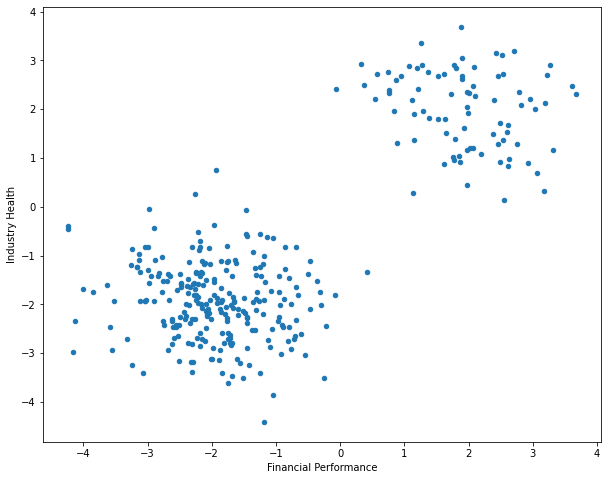

In [107]:
# Plot test data

#testing_features.loc[testing_features["Firm Category"] == 1, 'color'] = 'r' 
#testing_features.loc[testing_features["Firm Category"] == 0, 'color'] = 'b' 

testing_features.plot.scatter(x="Financial Performance",
                             y="Industry Health",
                            # c = "color" ,
                             figsize = (10,8) );

In [108]:
startup_success['Firm Category'].value_counts()

0    978
1    346
Name: Firm Category, dtype: int64

In [109]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

In [99]:
# Split dataset


In [100]:
# Scale the data


In [110]:
# Fit the data
logistic_regression_model.fit(training_features, training_targets)

LogisticRegression()

In [111]:
display(training_features.head())
display(testing_features.head())

,Financial Performance,Industry Health
181,-1.814004,-1.453959
478,-1.544877,-0.456960
51,-1.118211,-2.983659
660,0.405491,1.953855
1240,-3.713973,-2.664135


,Financial Performance,Industry Health
463,-2.216983,-0.509670
1161,-2.183013,-0.709311
540,1.999510,2.325408
1257,2.603490,1.536997
1304,-2.772764,-1.745046


In [113]:
# Make predictions using the test data
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(testing_features)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": testing_targets})
results_df

,Prediction,Actual
463,0,0
1161,0,0
540,1,1
1257,1,1
1304,0,0
...,...,...
266,0,0
254,1,1
421,0,0
852,0,0


In [114]:
# Apply the fitted model to the test dataset
testing_predictions = logistic_regression_model.predict(testing_features)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": testing_targets})
results_df


,Testing Data Predictions,Testing Data Actual Targets
463,0,0
1161,0,0
540,1,1
1257,1,1
1304,0,0
...,...,...
266,0,0
254,1,1
421,0,0
852,0,0


In [115]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(testing_targets, testing_predictions)



1.0

In [10]:
# Print confusion matrix


[[119   3]
 [  3 125]]


In [11]:
# Print classification report


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       0.98      0.98      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

